# Concentration Caluclator for Microdissected Samples
This journal will be used to calculate the dopamine and serotonin concentrations of microdissected samples given a standard curve, the tissue mass, and the volume in which the tissue was sonicated, and the sample IDs. 

In [1]:
# This cell imports necessary libraries and provides their respective alias

import pandas as pd # used to manipulate CSVs
import numpy as np # used to perform calculations
from scipy.stats import linregress as linreg # used to extract m, b, & r^2
import matplotlib.pyplot as plt # used to generate plots
from IPython.display import display

## Data
In this experiment, tissue samples were taken from freshly dissected brains of animals after half an hour of spinal cord stimulation, or not. 

The tissue was stored at -80C before being weighed and submerged in ice cold 0.1 M Perchloric Acid with 10 mM EDTA. 100 ul of solution was used per 25 mg of tissue, with tissue weighing less than 25 mg being submerged in 100 ul. The tissue was then sonicated three times for 15 seconds at 40% power, left on ice for 15 minutes to allow precipitation, and then centrifuged at 12000 RPM for 15 minutes.

The cleared solution was then run on an HPLC and a standard curve was generated for each experiment.

In [2]:
#This cell will import the csv files containing, respectively, data from:

Tissues = pd.read_csv('Tissue_data.csv') # the microdissected samples
Curves = pd.read_csv('Tissue_curves.csv') # standard curves for given HPLC Runs 

print("Standard Curve Values:")
display(Curves)

print("\nExperimental Values:")
display(Tissues)

Standard Curve Values:


,Dopa (V.s),5-HT (V.s),Dopa Stock (pmol),5-Ht Stock (pmol),Curve
0,4.53,8.33,32.641337,28.374429,1
1,1.81,3.89,16.320668,14.187214,1
2,0.24,0.44,1.632067,1.418721,1
3,0.04,0.07,0.163207,0.141872,1
4,0.01,0.02,0.081603,0.070936,1
5,4.72,7.26,32.641337,28.374429,2
6,2.66,4.19,16.320668,14.187214,2
7,0.27,0.46,1.632067,1.418721,2
8,0.04,0.06,0.163207,0.141872,2
9,0.01,0.03,0.081603,0.070936,2



Experimental Values:


,Condition,Animal,Tissue,Weight,Volume,Dopa (V.s),5-HT (V.s),Standard Curve
0,Unstimulated,D5,Str punch,19,100,2.2,0.03,1
1,Unstimulated,D5,SN,78,312,0.93,2.20,1
2,Unstimulated,D5,DRN,180,720,0.15,4.36,1
3,Unstimulated,CCM197,Str punch,21,100,1.55,0.06,2
4,Unstimulated,CCM197,SN,75,300,1,4.47,2
5,Unstimulated,CCM197,DRN,124,496,0.54,4.40,2
6,Unstimulated,CCM198,Str punch,21,100,3.69,0.24,3
7,Unstimulated,CCM198,SN,144,576,0.64,4.37,2
8,Unstimulated,CCM198,DRN,115,460,0.19,3.25,2
9,Unstimulated,CCM199,Str punch,19,100,3.93,0.41,2


## Standard Curves
HPLC standard curves were prepared fresh and predetermined to be within the linear range. Thus the equation $y=mx+b$ is appropriate, and the coefficients $m$ and $b$ will be extracted as will the measure of linearity, $r^{2}$

In [3]:
#This cell will create an array containing the coefficients
lin = pd.DataFrame({'m': [], 'b': [], 'r2': []}) #Create dataframe
Dopa = lin
Ser = lin

# This for loop will iterate through all unique HPLC runs to calculate and store m, b, and r^2
for ii in range(max(Curves['Curve'])): #uses max to find last experiment
    #calculates values for dopamine
    lr = linreg(Curves['Dopa (V.s)'][Curves['Curve']==ii+1], Curves['Dopa Stock (pmol)'][Curves['Curve']==ii+1])
    m=lr[0]
    b=lr[1]
    r2=lr[2]

    #stores values for dopamine
    Dopa= Dopa.append({'m': m, 'b': b, 'r2': r2}, ignore_index=True)
    
    #calculates values for serotonin
    lr = linreg(Curves['5-HT (V.s)'][Curves['Curve']==ii+1], Curves['5-Ht Stock (pmol)'][Curves['Curve']==ii+1])
    m=lr[0]
    b=lr[1]
    r2=lr[2]

    #stores values for serotonin
    Ser= Ser.append({'m': m, 'b': b, 'r2': r2}, ignore_index=True)

print("Dopamine Regression Values:")
display(Dopa)
print("\nSerotonin Regression Values:")
display(Ser)

Dopamine Regression Values:


,b,m,r2
0,0.451146,7.327775,0.994684
1,-0.317908,6.808886,0.998157
2,-0.099768,6.881732,0.999946



Serotonin Regression Values:


,b,m,r2
0,0.071675,3.438023,0.999414
1,-0.376904,3.839808,0.997339
2,0.122206,3.891263,0.998790


## Sample Concentrations
Using the experiment specific linear regression values the samples will have their concentratiosn caluclated

In [4]:
# This cell will calculate the concentration of Dopa and 5-HT in pmol

# Creates empty columns in dataframe Tissues
Tissues['Dopa (pmol)']=np.nan
Tissues['5-HT (pmol)']=np.nan
Tissues['Dopa (pM/mg)']=np.nan
Tissues['5-HT (pM/mg)']=np.nan

# This for loop will iterate through all tissue samples and save the pmol concentration of each
for ii in range(len(Tissues)) :
    
    if (Tissues['Dopa (V.s)'][ii] != 'over'):
# x=(y-b)/m for Dopamine
        Tissues.loc[ii, 'Dopa (pmol)'] = (float(Tissues['Dopa (V.s)'][ii]) -Dopa['b'][(Tissues['Standard Curve'][ii]-1)])/Dopa['m'][(Tissues['Standard Curve'][ii]-1)]
# Removes Negatives  
        if Tissues['Dopa (pmol)'][ii] < 0:
            Tissues.loc[ii,'Dopa (pmol)'] = 0
#  Sets concentration to maximum possible from experimental standard curve 
    else :
         Tissues.loc[ii,'Dopa (pmol)'] = (32.641337 -Dopa['b'][(Tissues['Standard Curve'][ii]-1)])/Dopa['m'][(Tissues['Standard Curve'][ii]-1)]
    Tissues.loc[ii,'Dopa (pM/mg)'] = (Tissues['Dopa (pmol)'][ii]/(Tissues['Volume'][ii]/10**6))/Tissues['Weight'][ii]
            
    if (Tissues['5-HT (V.s)'][ii] != 'over') :
# x=(y-b)/m for 5-HT
        Tissues.loc[ii,'5-HT (pmol)'] = (float(Tissues['5-HT (V.s)'][ii])-Ser['b'][(Tissues['Standard Curve'][ii]-1)])/Ser['m'][(Tissues['Standard Curve'][ii]-1)]
# Removes Negatives
        if float(Tissues['5-HT (pmol)'][ii]) < 0:
            Tissues.loc[ii,'5-HT (pmol)'] = 0   
#  Sets concentration to maximum possible from experimental standard curve for readings that are over
    else :
        Tissues.loc[ii,'5-HT (pmol)'] = (28.374429 -Ser['b'][(Tissues['Standard Curve'][ii]-1)])/Ser['m'][(Tissues['Standard Curve'][ii]-1)]
# Converts 
    Tissues.loc[ii,'5-HT (pM/mg)'] = (Tissues['5-HT (pmol)'][ii]/(Tissues['Volume'][ii]/10**6))/Tissues['Weight'][ii]
        
display(Tissues[['Condition','Animal','Tissue','Dopa (pmol)','Dopa (pM/mg)','5-HT (pmol)','5-HT (pM/mg)']])

,Condition,Animal,Tissue,Dopa (pmol),Dopa (pM/mg),5-HT (pmol),5-HT (pM/mg)
0,Unstimulated,D5,Str punch,0.238661,125.611010,0.000000,0.000000
1,Unstimulated,D5,SN,0.065348,2.685230,0.619055,25.437818
2,Unstimulated,D5,DRN,0.000000,0.000000,1.247323,9.624404
3,Unstimulated,CCM197,Str punch,0.274334,130.635170,0.113783,54.182278
4,Unstimulated,CCM197,SN,0.193557,8.602536,1.262278,56.101235
5,Unstimulated,CCM197,DRN,0.125998,2.048619,1.244048,20.227102
6,Unstimulated,CCM198,Str punch,0.550700,262.237976,0.030271,14.414913
7,Unstimulated,CCM198,SN,0.140685,1.696144,1.236235,14.904451
8,Unstimulated,CCM198,DRN,0.074595,1.410111,0.944554,17.855454
9,Unstimulated,CCM199,Str punch,0.623877,328.356362,0.204933,107.859569


## Average Concentrations
The Average and RMD for each condition are next calculated and plotted as bar graphs

In [5]:
# This cell will calculated average concentrations and RMD

# Create data frame for output and its index, respectively
Agg =pd.DataFrame()
kk=0

# Iteratively finds each combination of Condition and Tissue to extract aggregated data from
for jj in range(len(pd.unique(Tissues['Condition']))): #Iterate through Conditions
    for ii in range(len(pd.unique(Tissues['Tissue']))): #Iterate through Tissues

# Calculates and populates data for each aggregate value
        Agg.loc[kk,'Condition'] = pd.unique(Tissues['Condition'])[jj]
        Agg.loc[kk,'Tissue'] = pd.unique(Tissues['Tissue'])[ii]
        Agg.loc[kk,'Dopa (pM/mg)'] = (np.average(Tissues.loc[(Tissues['Condition']==pd.unique(Tissues['Condition'])[jj]) & 
                               (Tissues['Tissue']==pd.unique(Tissues['Tissue'])[ii]), 
                               ['Dopa (pM/mg)']]))
        Agg.loc[kk,'Std Dopa'] = ((np.std(Tissues.loc[(Tissues['Condition']==pd.unique(Tissues['Condition'])[jj]) & 
                               (Tissues['Tissue']==pd.unique(Tissues['Tissue'])[ii]), 
                               ['Dopa (pM/mg)']])))[0]             
        Agg.loc[kk,'RMD Dopa'] = ((np.std(Tissues.loc[(Tissues['Condition']==pd.unique(Tissues['Condition'])[jj]) & 
                               (Tissues['Tissue']==pd.unique(Tissues['Tissue'])[ii]), 
                               ['Dopa (pM/mg)']]))/Agg['Dopa (pM/mg)'][kk])[0]             
        Agg.loc[kk,'5-HT (pM/mg)'] = (np.average(Tissues.loc[(Tissues['Condition']==pd.unique(Tissues['Condition'])[jj]) & 
                               (Tissues['Tissue']==pd.unique(Tissues['Tissue'])[ii]), 
                               ['5-HT (pM/mg)']]))        
        Agg.loc[kk,'RMD 5-HT'] = ((np.std(Tissues.loc[(Tissues['Condition']==pd.unique(Tissues['Condition'])[jj]) & 
                               (Tissues['Tissue']==pd.unique(Tissues['Tissue'])[ii]), 
                               ['5-HT (pM/mg)']]))/Agg['5-HT (pM/mg)'][kk])[0]
        Agg.loc[kk,'Std 5-HT'] = ((np.std(Tissues.loc[(Tissues['Condition']==pd.unique(Tissues['Condition'])[jj]) & 
                               (Tissues['Tissue']==pd.unique(Tissues['Tissue'])[ii]), 
                               ['5-HT (pM/mg)']])))[0]

# Increase index of output for next data extraction
        kk=kk+1
        
display(Agg)        

,Condition,Tissue,Dopa (pM/mg),Std Dopa,RMD Dopa,5-HT (pM/mg),RMD 5-HT,Std 5-HT
0,Unstimulated,Str punch,211.710130,86.812462,0.410053,44.114190,0.947811,41.811926
1,Unstimulated,SN,4.116754,2.666100,0.647622,27.504541,0.623098,17.138014
2,Unstimulated,DRN,0.971344,0.805178,0.828932,13.383447,0.438983,5.875104
3,Stimulated,Str punch,100.306558,48.984202,0.488345,22.620767,0.459246,10.388505
4,Stimulated,SN,6.759042,4.144418,0.613166,9.076318,0.538495,4.887551
5,Stimulated,DRN,0.528492,0.133992,0.253536,9.699543,0.489507,4.747993


/home/sam/anaconda3/envs/dlc/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


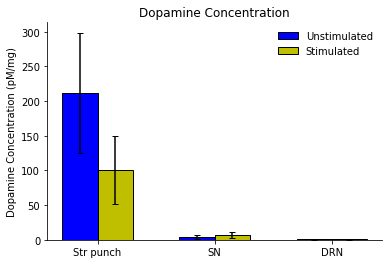

In [12]:
# This cell will generate a bar graph for Dopamine concentrations from the newly calculated concentrations

#Parameters and for loop to iterate through each condition and determine spacing
fig = plt.figure()
ax = fig.add_subplot(111)

space = 0.4

conditions = pd.unique(Agg['Condition'])

n = len(conditions)

width = (1 - space) / (len(conditions))

for ii,cond in enumerate(conditions):
    vals = Agg['Dopa (pM/mg)'][Agg['Condition']==cond]
    STD = Agg['Std Dopa'][Agg['Condition']==cond]
    col = ['b', 'y']
    pos = [j - (1 - space) / 2. + ii * width for j in range(1,4)]
    ax.bar(pos, vals, width=width, 
           color= (col[ii]), edgecolor ='k', linewidth= 1,
           yerr=STD, ecolor ='k', capsize = 3,
           label=cond)

font = {'fontname':'Times New Roman'}    
    
#X-axis parameters
ax.set_xticks([j - (1.3 - space) / 2. + ii * width for j in range(1,4)])
ax.set_xticklabels(Agg['Tissue'], **font)
plt.setp(plt.xticks()[1], rotation=0)

#Y-axis parameters
ax.set_ylabel('Dopamine Concentration (pM/mg)', **font)

#Title and legend parameters
ax.set_title("Dopamine Concentration", **font)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.legend(frameon=False)

display()

plt.savefig('Dopamine_Conc_Microdissection.png', dpi=300, transparent=True)

/home/sam/anaconda3/envs/dlc/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


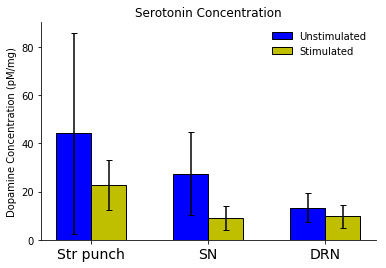

In [13]:
# This cell will generate a bar graph for Serotonin concentrations from the newly calculated concentrations

#Parameters and for loop to iterate through each condition and determine spacing
fig = plt.figure()
ax = fig.add_subplot(111)

space = 0.4

conditions = pd.unique(Agg['Condition'])

n = len(conditions)

width = (1 - space) / (len(conditions))

for ii,cond in enumerate(conditions):
    vals = Agg['5-HT (pM/mg)'][Agg['Condition']==cond]
    STD = Agg['Std 5-HT'][Agg['Condition']==cond]
    col = ['b', 'y']
    pos = [j - (1 - space) / 2. + ii * width for j in range(1,4)]
    ax.bar(pos, vals, width=width, 
           color= (col[ii]), edgecolor ='k', linewidth= 1,
           yerr=STD, ecolor ='k', capsize = 3,
           label=cond)

    
font = {'fontname':'Times New Roman'}

#X-axis parameters
ax.set_xticks([j - (1.3 - space) / 2. + ii * width for j in range(1,4)])
ax.set_xticklabels(Agg['Tissue'], **font, fontsize=14)
plt.setp(plt.xticks()[1], rotation=0)

#Y-axis parameters
ax.set_ylabel('Dopamine Concentration (pM/mg)', **font)

#Title and legend parameters
ax.set_title("Serotonin Concentration", **font)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1])
plt.legend(frameon=False)

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

display()

plt.savefig('Serotonin_Conc_Microdissection.png', dpi=300, transparent=True)